# a quick tour for going end-to-end model building and tuning for MNIST dataset

In [1]:
%matplotlib inline

import utils
from utils import *

Using TensorFlow backend.


# Setup

In [2]:
batch_size = 16

In [22]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [23]:
# Remember this step is necessary for MNIST data
X_train = np.expand_dims(X_train, 1) # np.expand_dims(X_train, 3) # for channel last case
X_test = np.expand_dims(X_test, 1) # np.expand_dims(X_test, 3) # for channel last case 

In [24]:
X_train.shape, X_test.shape

((60000, 1, 28, 28), (10000, 1, 28, 28))

In [25]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

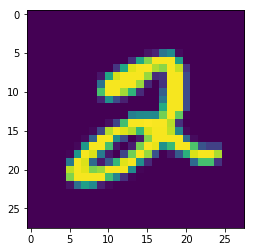

In [90]:
plt.imshow(X_train[5][0])

#### turn y_train, y_test from classes into labels by onehot encoding

In [26]:
y_train = onehot(y_train)
y_test = onehot(y_test)

In [27]:
y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [29]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

In [30]:
mean_px, std_px

(33.31842, 78.56749)

In [33]:
def norm_input(x): return (x - mean_px) / std_px

# Build and Tune Model (to overfitting)
** tune it to overfitting to make sure that your model is complex enough to work well **

** after making it, then we can tune it to reduce overfitting for the next steps by different methods **

## Linear Model

In [39]:
def get_lin_model():
    model = Sequential([
        Lambda(norm_input, input_shape=(1, 28, 28)),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [40]:
lm = get_lin_model()

In [42]:
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=batch_size)
test_batches = gen.flow(X_test, y_test, batch_size=batch_size)

#### Important Tip: Procedures to tune learning rate
**1. When running, always start doing 1 epoch with a fairly low learning rate. Keras gives a good default learning rate, 0.001, so I always start with default learning rate. And then you can tune into you own learning rate.**

**2. Once you get started, you can raise your learning rate to run several epochs with learning rate, 0.1.**

**3. After you make it, you can start tuning your learning rate to like 0.01 to run more epochs until you get to overfitting.**


In [55]:
print(K.get_value(lm.optimizer.lr))
lm.summary()

0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 1, 28, 28)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [48]:
lm.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=1, 
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))

Epoch 1/1
3750/3750 [==============================] - 7s - loss: 0.3728 - acc: 0.8921 - val_loss: 0.3037 - val_acc: 0.9124


In [56]:
lm.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=1, 
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))

Epoch 1/1
3750/3750 [==============================] - 7s - loss: 0.3086 - acc: 0.9134 - val_loss: 0.3155 - val_acc: 0.9138


In [57]:
lm.optimizer.lr = 0.01

In [59]:
lm.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=10, 
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))

Epoch 1/10
3750/3750 [==============================] - 6s - loss: 0.2909 - acc: 0.9195 - val_loss: 0.2949 - val_acc: 0.9196
Epoch 2/10
3750/3750 [==============================] - 7s - loss: 0.2872 - acc: 0.9197 - val_loss: 0.3273 - val_acc: 0.9085
Epoch 3/10
3750/3750 [==============================] - 7s - loss: 0.2831 - acc: 0.9217 - val_loss: 0.3106 - val_acc: 0.9159
Epoch 4/10
3750/3750 [==============================] - 7s - loss: 0.2827 - acc: 0.9222 - val_loss: 0.2957 - val_acc: 0.9193
Epoch 5/10
3750/3750 [==============================] - 6s - loss: 0.2791 - acc: 0.9229 - val_loss: 0.3335 - val_acc: 0.9101
Epoch 6/10
3750/3750 [==============================] - 7s - loss: 0.2784 - acc: 0.9235 - val_loss: 0.3272 - val_acc: 0.9141
Epoch 7/10
3750/3750 [==============================] - 7s - loss: 0.2786 - acc: 0.9241 - val_loss: 0.3147 - val_acc: 0.9188
Epoch 8/10
3750/3750 [==============================] - 7s - loss: 0.2749 - acc: 0.9237 - val_loss: 0.3272 - val_acc: 0.9127


## Single Dense Layer

In [60]:
def get_fc_model():
    model = Sequential([
        Lambda(norm_input, input_shape=(1, 28, 28)),
        Flatten(),
        Dense(512, activation='softmax'),
        Dense(10, activation='softmax')
    ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [61]:
fc = get_fc_model()

In [63]:
fc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 1, 28, 28)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [62]:
fc.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=1, 
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))

Epoch 1/1
3750/3750 [==============================] - 45s - loss: 1.0174 - acc: 0.8027 - val_loss: 0.5340 - val_acc: 0.8293


In [64]:
fc.optimizer.lr = 0.1

In [66]:
fc.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=10, 
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))

Epoch 1/10
3750/3750 [==============================] - 46s - loss: 0.4290 - acc: 0.8540 - val_loss: 0.4139 - val_acc: 0.8661
Epoch 2/10
3750/3750 [==============================] - 44s - loss: 0.3999 - acc: 0.8636 - val_loss: 0.4222 - val_acc: 0.8412
Epoch 3/10
3750/3750 [==============================] - 46s - loss: 0.3839 - acc: 0.8716 - val_loss: 0.4078 - val_acc: 0.8582
Epoch 4/10
3750/3750 [==============================] - 44s - loss: 0.3657 - acc: 0.8792 - val_loss: 0.3848 - val_acc: 0.8834
Epoch 5/10
3750/3750 [==============================] - 45s - loss: 0.3453 - acc: 0.8948 - val_loss: 0.3544 - val_acc: 0.9025
Epoch 6/10
3750/3750 [==============================] - 44s - loss: 0.3141 - acc: 0.9136 - val_loss: 0.2936 - val_acc: 0.9280
Epoch 7/10
3750/3750 [==============================] - 49s - loss: 0.2579 - acc: 0.9363 - val_loss: 0.2548 - val_acc: 0.9403
Epoch 8/10
3750/3750 [==============================] - 72s - loss: 0.2312 - acc: 0.9445 - val_loss: 0.2774 - val_acc:

In [67]:
fc.optimizer.lr = 0.01

In [68]:
fc.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=10, 
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))

Epoch 1/10
3750/3750 [==============================] - 49s - loss: 0.2020 - acc: 0.9520 - val_loss: 0.2193 - val_acc: 0.9494
Epoch 2/10
3750/3750 [==============================] - 46s - loss: 0.1955 - acc: 0.9530 - val_loss: 0.2197 - val_acc: 0.9506
Epoch 3/10
3750/3750 [==============================] - 47s - loss: 0.1867 - acc: 0.9560 - val_loss: 0.2249 - val_acc: 0.9505
Epoch 4/10
3750/3750 [==============================] - 72s - loss: 0.1828 - acc: 0.9569 - val_loss: 0.2315 - val_acc: 0.9488
Epoch 5/10
3750/3750 [==============================] - 43s - loss: 0.1765 - acc: 0.9592 - val_loss: 0.2268 - val_acc: 0.9477
Epoch 6/10
3750/3750 [==============================] - 43s - loss: 0.1727 - acc: 0.9608 - val_loss: 0.2162 - val_acc: 0.9502
Epoch 7/10
3750/3750 [==============================] - 44s - loss: 0.1683 - acc: 0.9619 - val_loss: 0.2229 - val_acc: 0.9517
Epoch 8/10
3750/3750 [==============================] - 70s - loss: 0.1636 - acc: 0.9630 - val_loss: 0.2138 - val_acc:

## Basic 'VGG-style' CNN

In [70]:
def get_model():
    model = Sequential([
        Lambda(norm_input, input_shape=(1, 28, 28)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [71]:
model = get_model()

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 1, 28, 28)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 10, 10)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 8, 8)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 4, 4)          0         
__________

In [73]:
model.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=1, 
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))

Epoch 1/1
3750/3750 [==============================] - 685s - loss: 0.0951 - acc: 0.9702 - val_loss: 0.0341 - val_acc: 0.9888


In [74]:
model.optimizer.lr = 0.1

In [75]:
model.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=4, 
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))

Epoch 1/10
3750/3750 [==============================] - 704s - loss: 0.0395 - acc: 0.9880 - val_loss: 0.0493 - val_acc: 0.9873
Epoch 2/10
3750/3750 [==============================] - 1024s - loss: 0.0277 - acc: 0.9915 - val_loss: 0.0512 - val_acc: 0.9850
Epoch 3/10
3750/3750 [==============================] - 600s - loss: 0.0231 - acc: 0.9928 - val_loss: 0.0330 - val_acc: 0.9908
Epoch 4/10
3750/3750 [==============================] - 659s - loss: 0.0192 - acc: 0.9940 - val_loss: 0.0243 - val_acc: 0.9930
Epoch 5/10
3750/3750 [==============================] - 658s - loss: 0.0164 - acc: 0.9950 - val_loss: 0.0292 - val_acc: 0.9922
Epoch 6/10
3750/3750 [==============================] - 693s - loss: 0.0143 - acc: 0.9958 - val_loss: 0.0605 - val_acc: 0.9865
Epoch 7/10
3750/3750 [==============================] - 677s - loss: 0.0145 - acc: 0.9957 - val_loss: 0.0410 - val_acc: 0.9909
Epoch 8/10
3750/3750 [==============================] - 702s - loss: 0.0133 - acc: 0.9960 - val_loss: 0.0461 -

In [76]:
model.optimizer.lr = 0.01

In [77]:
model.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=10, 
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))

Epoch 1/10
3750/3750 [==============================] - 683s - loss: 0.0125 - acc: 0.9969 - val_loss: 0.0354 - val_acc: 0.9938
Epoch 2/10
3750/3750 [==============================] - 683s - loss: 0.0105 - acc: 0.9971 - val_loss: 0.0576 - val_acc: 0.9899
Epoch 3/10
3750/3750 [==============================] - 680s - loss: 0.0142 - acc: 0.9968 - val_loss: 0.0622 - val_acc: 0.9912
Epoch 4/10
3750/3750 [==============================] - 653s - loss: 0.0126 - acc: 0.9972 - val_loss: 0.0480 - val_acc: 0.9912
Epoch 5/10
3750/3750 [==============================] - 681s - loss: 0.0086 - acc: 0.9977 - val_loss: 0.0680 - val_acc: 0.9912
Epoch 6/10
3750/3750 [==============================] - 684s - loss: 0.0138 - acc: 0.9974 - val_loss: 0.0678 - val_acc: 0.9915
Epoch 7/10
3750/3750 [==============================] - 695s - loss: 0.0137 - acc: 0.9974 - val_loss: 0.0834 - val_acc: 0.9904
Epoch 8/10
3750/3750 [==============================] - 671s - loss: 0.0150 - acc: 0.9970 - val_loss: 0.0593 - 

#### Important Tip: 
- **Start with the over-fitting to make sure your NN architecture is complex enough to works well first, and then try to reduce your over-fitting by the methods. (not to reduce your complexity of your architecture until it is necessary)**

## Data Augmentation

In [78]:
model = get_model()

In [80]:
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, 
                              height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
test_batches = gen.flow(X_test, y_test, batch_size=batch_size)

In [81]:
model.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=1, 
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))

Epoch 1/1
3750/3750 [==============================] - 678s - loss: 0.0948 - acc: 0.9704 - val_loss: 0.0488 - val_acc: 0.9852


## Batch Norm + Data Augmentation

**Reminder: BatchNormalization: after a Conv2D layer with data_format="channels_first", set axis=1 in BatchNormalization **

In [82]:
def get_model_bn():
    model = Sequential([
        Lambda(norm_input, input_shape=(1, 28, 28)),
        Conv2D(32, (3,3), activation='relu'),
        BatchNormalization(axis=1),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling(),
        BatchNormalization(axis=1),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(axis=1),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Batch Norm + Data Augmentation + Dropout

In [ ]:
def get_model_bn_dropout():
    model = Sequential([
        Lambda(norm_input, input_shape=(1, 28, 28)),
        Conv2D(32, (3,3), activation='relu'),
        BatchNormalization(axis=1),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalziation(axis=1),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Ensembling

In [ ]:
def fit_model():
    model = get_model_bn_dropout()
    model.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=1, verbose=2,
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))
    model.optimizer.lr = 0.1
    model.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=4, verbose=2,
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))
    model.optimizer.lr = 0.01
    model.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=12, verbose=2,
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))
    model.optimizer.lr = 0.001
    model.fit_generator(batches, steps_per_epoch=int(math.ceil(batches.n / batches.batch_size)), epochs=18, verbose=2,
                 validation_data = test_batches, validation_steps=int(math.ceil(test_batches.n / test_batches.batch_size)))
    return model

In [ ]:
models = [fit_model() for i in range(6)]

In [ ]:
path = 'data/mnist/'
model_path = path + 'models/'
if not os.path.exists(path): os.mkdir(path)
if not os.path.exists(model_path): os.mkdir(model_path)

In [ ]:
for i, mdl in enumerate(models):
    mdl.save_weights(model_path+'cnn-mnist23-'+str(i)+'.pkl')

In [ ]:
# Load Weights
"""
models = []
for i in range(6):
    model = get_model_bn()
    model.load_weights(model_path+'cnn-mnist23-'+str(i)+'.pkl')
    models.append(model)
models = np.array(models)
"""

In [ ]:
evals = np.array([mdl.evaluate(X_test, y_test, batch_size=batch_size*4) for mdl in models])

In [ ]:
evals.mean(axis=0)

In [ ]:
all_preds = np.stack([mdl.predict(X_test, batch_size=batch_size*4) for mdl in models])

In [ ]:
all_preds.shape

In [ ]:
avg_preds = all_preds.mean(axis=0)

In [ ]:
#keras.metrics.categorical_accuracy(y_test, avg_preds).eval()

# https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html
from keras.metrics import categorical_accuracy as accuracy

acc_value = accuracy(y_test, avg_preds)
with sess.as_default():
    eval_result = acc_value.eval()
    
eval_result.mean()